# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [84]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [85]:
pd.set_option('display.max_colwidth', None)

In [86]:
stop_words = set(stopwords.words('spanish'))

In [87]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [88]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_labeled.csv', sep = ',')

In [89]:
tweets_df.shape

(296, 2)

In [90]:
tweets_df.head()

,full_text,sentiment
0,@Nata_Salud @Sandrag69 @AndresMejiaV ¡Hola Natalia! Te invitamos a descubrir tu #MatchPresidencial aquí: https://t.co/0E1tZKypTK,neutral
1,@supershadai @Registraduria Quien o que institución en Colombia atiende los reclamos al fraude electoral?\r\nPorque no suspender a al registrador que ya la defeco en las elecciones de senado y camara.\r\nHay una desconfianza general en cuanto a las presidenciales.\r\nEstán provocando una respuesta violenta.,negative
2,@BOLIBAR2 @AndresPastrana_ @santiagoangelp Un poco tarde con las elecciones encima… mal para Colombia,negative
3,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive
4,"@BOLIBAR2 @CNE_COLOMBIA @AndresPastrana_ Aquí no va a pasar nada, y petro de va a robar las elecciones presidenciales y el país",negative


In [91]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.668919
neutral     0.270270
positive    0.060811
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [92]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [93]:
tweets_labeled_df.shape

(296, 2)

In [94]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [95]:
tweets_unlabeled_df.shape

(0, 2)

In [96]:
# Scenario 3: Treating neutral as positive classes
tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

### Splitting train and test datasets

In [97]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.7 , stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [98]:
X_train.shape

(88,)

In [99]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.670455
positive    0.329545
Name: sentiment, dtype: float64

In [100]:
X_test.shape

(208,)

In [101]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.668269
positive    0.331731
Name: sentiment, dtype: float64

### Vectorizing texts

In [102]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [103]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [104]:
X_bow = bow.fit_transform(X_train)

In [105]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [106]:
model = RandomForestClassifier()

In [107]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [108]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

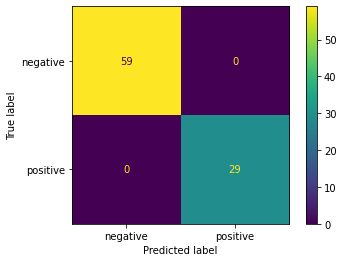

In [109]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

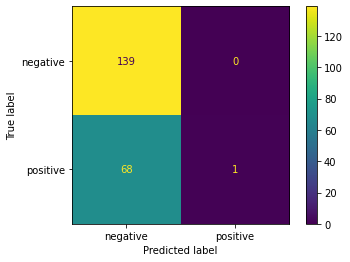

In [110]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [111]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.67149758 1.        ]
Recall: [1.         0.01449275]
F1: [0.80346821 0.02857143]


### Training and evaluating a model using TF-IDF

In [112]:
model = RandomForestClassifier()

In [113]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [114]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

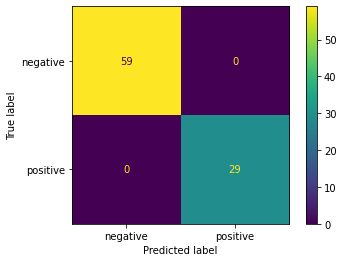

In [115]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

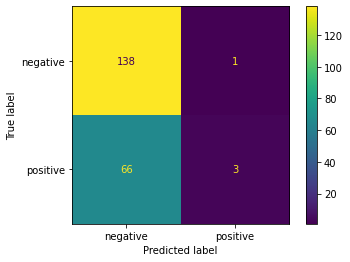

In [116]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [117]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.67647059 0.75      ]
Recall: [0.99280576 0.04347826]
F1: [0.80466472 0.08219178]


### How interpret the results?

### Analyzing errors

In [118]:
error_df1 = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df1.drop('index', inplace = True, axis = 1)

In [119]:
error_df1.shape

(208, 3)

In [120]:
error_df1.loc[error_df1['actual'] != error_df1['predicted']].head(20)

,full_text,actual,predicted
1,Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia https://t.co/l70pcQRXYC,positive,negative
9,Match presidencial: descubra su candidato ideal para las elecciones en Colombia | El Espectador #elEspectador\r\n\r\n🚂#trendeconciencia\r\n📺\r\n👇 \r\nhttps://t.co/14UgzE8rpJ via @PodcastAddict https://t.co/dFY6PvhhHS,positive,negative
10,🌍 INTERNACIONALES I Colombia: trayecto final de cara a las elecciones presidenciales | Política Hoy https://t.co/ppUlHfd7bj,positive,negative
13,"🕊 El proceso de paz entendido cómo una estructura de oportunidad, para poner fin al conflicto y escuchar a sectores sociales excluidos. 🎤 #CienDías N. 104 🔗 https://t.co/d2YUoyQ8k6\r\n\r\n📸 @JEP_Colombia https://t.co/igChGJnaFX",positive,negative
17,Match presidencial: descubra su candidato ideal para las elecciones presidenciales en Colombia https://t.co/PTzW620XIz,positive,negative
18,¿Quién es ese candidato que defiende sus mismas ideas? 🧐\r\n\r\n¡Descubralo en nuestro #MatchPresidencial! Una herramienta que creamos junto a @cifrasyconcepto y @elespectador para que el próximo 29 de mayo salga a votar por su candidato ideal. \r\n\r\nhttps://t.co/x1nxEYCfD7 https://t.co/78W2DyWiKB,positive,negative
19,#EnVivo Match presidencial: descubra su candidato ideal para las elecciones presidenciales en Colombia\r\nhttps://t.co/wR0HWCjnIQ https://t.co/Do4GVNQ6SO,positive,negative
21,Eso sabe ;)\r\nAdelante #PetroPresidente2022 \r\nhttps://t.co/xscQ26b62m https://t.co/NIJNT0Sms7,positive,negative
22,"Episodio 8 - En este nuevo episodio Alicia Eugenia Silva nos plantea una reflexión, en estas elecciones ¿el país sigue polarizado? o ¿nace un nuevo bipartidismo en Colombia? https://t.co/HYnK26DpNn via @YouTube",positive,negative
23,Cerca de 3 mil jurados de votación de la Registraduría están inhabilitados. \r\n\r\nLa indagación fue adelantada por la Procuraduría ante las primarias de las elecciones presidenciales de Colombia. \r\nhttps://t.co/DrcoKxOTPs,positive,negative


### Analyzing errors TF-IDF

In [121]:
error_df2 = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_tfidf_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df2.drop('index', inplace = True, axis = 1)

In [122]:
error_df2.shape

(208, 3)

In [123]:
error_df2.loc[error_df2['actual'] != error_df2['predicted']].head(20)

,full_text,actual,predicted
1,Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia https://t.co/l70pcQRXYC,positive,negative
9,Match presidencial: descubra su candidato ideal para las elecciones en Colombia | El Espectador #elEspectador\r\n\r\n🚂#trendeconciencia\r\n📺\r\n👇 \r\nhttps://t.co/14UgzE8rpJ via @PodcastAddict https://t.co/dFY6PvhhHS,positive,negative
10,🌍 INTERNACIONALES I Colombia: trayecto final de cara a las elecciones presidenciales | Política Hoy https://t.co/ppUlHfd7bj,positive,negative
13,"🕊 El proceso de paz entendido cómo una estructura de oportunidad, para poner fin al conflicto y escuchar a sectores sociales excluidos. 🎤 #CienDías N. 104 🔗 https://t.co/d2YUoyQ8k6\r\n\r\n📸 @JEP_Colombia https://t.co/igChGJnaFX",positive,negative
17,Match presidencial: descubra su candidato ideal para las elecciones presidenciales en Colombia https://t.co/PTzW620XIz,positive,negative
18,¿Quién es ese candidato que defiende sus mismas ideas? 🧐\r\n\r\n¡Descubralo en nuestro #MatchPresidencial! Una herramienta que creamos junto a @cifrasyconcepto y @elespectador para que el próximo 29 de mayo salga a votar por su candidato ideal. \r\n\r\nhttps://t.co/x1nxEYCfD7 https://t.co/78W2DyWiKB,positive,negative
19,#EnVivo Match presidencial: descubra su candidato ideal para las elecciones presidenciales en Colombia\r\nhttps://t.co/wR0HWCjnIQ https://t.co/Do4GVNQ6SO,positive,negative
21,Eso sabe ;)\r\nAdelante #PetroPresidente2022 \r\nhttps://t.co/xscQ26b62m https://t.co/NIJNT0Sms7,positive,negative
22,"Episodio 8 - En este nuevo episodio Alicia Eugenia Silva nos plantea una reflexión, en estas elecciones ¿el país sigue polarizado? o ¿nace un nuevo bipartidismo en Colombia? https://t.co/HYnK26DpNn via @YouTube",positive,negative
23,Cerca de 3 mil jurados de votación de la Registraduría están inhabilitados. \r\n\r\nLa indagación fue adelantada por la Procuraduría ante las primarias de las elecciones presidenciales de Colombia. \r\nhttps://t.co/DrcoKxOTPs,positive,negative
